In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time #import libraries

In [2]:
URL='https://www.flipkart.com/search?q=water+purifier&sid=j9e%2Cabm%2Ci45&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&as-pos=2&as-type=RECENT&suggestionId=water+purifier%7CWater+purifiers&requestId=144abfd1-ee97-4b8c-a17f-08b02d56c430&as-searchtext=water%20purifier'
page=requests.get(URL)
page.status_code #extract page

200

In [3]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify()) #prettify page content

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.9e9635.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [4]:
name=soup.find('div',class_="_4rR01T")
name.text #extract name 

'Royal Aquafresh Gold Ceramic 16 ltr 16 L Gravity Based Water Purifier'

In [5]:
rating=soup.find('div',class_='_3LWZlK')
rating.text #extract price

'3.4'

In [8]:
price=soup.find('div',class_="_30jeq3 _1_WHN1")
price.text #extract price

'₹1,471'

In [9]:
product_details=soup.find_all('div',class_='_3pLy-c row')
print('Number of products: ',len(product_details))
product_details #extract product details of all products on webpage

Number of products:  24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_2tfzpE"><span>Sponsored</span></div><div class="_4rR01T">Royal Aquafresh Gold Ceramic 16 ltr 16 L Gravity Based Water Purifier</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTWAPGPA2WGZ8D6HGTSBA3AU_WAPGPA2WGZ8D6HGT_"><div class="_3LWZlK">3.4</div></span><span class="_2_R_DZ"><span><span>11 Ratings </span><span class="_13vcmD">&amp;</span><span> 3 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Non - Electrical &amp; Storage</li><li class="rgWa7D">manufacturer defect only</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹1,471</div><div class="_3I9_wc _27UcVY">₹<!-- -->2,999</div><div class="_3Ay6Sb"><span>50% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div>,
 <di

In [11]:
for product in product_details:
    #name
    name=product.find('div',class_="_4rR01T")
    if name is None:
        print('Name not available')
    else:
        print(name.text) 
    
    price=product.find('div',class_='_30jeq3 _1_WHN1')
    #price
    if price is None:
        print('Price not available')
    else:
        print(price.text)
    
    rating=product.find('div',class_='_3LWZlK')
    #rating
    if rating is None:
        print('Rating not available')
    else:
        print(rating.text)
    
    
    print('\n','='*100,'\n')

Royal Aquafresh Gold Ceramic 16 ltr 16 L Gravity Based Water Purifier
₹1,471
3.4


Royal Aquafresh ESC IQUE BIZ 10 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
Rating not available


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


Aqua Fresh MINERAL POT BLUE gravity based 16 L WATER PURIFIER 16 L Gravity Based Water Purifier
₹918
3.9


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD

In [13]:
#loop go through web pages
for x in range(1,21):
    URL='https://www.flipkart.com/search?q=water+purifier&sid=j9e%2Cabm%2Ci45&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&as-pos=2&as-type=RECENT&suggestionId=water+purifier%7CWater+purifiers&requestId=144abfd1-ee97-4b8c-a17f-08b02d56c430&as-searchtext=water%20purifier'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    print('Number of products: ',len(product_details))
    product_details
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            print('Name not available')
        else:
            print(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            print('Price not available')
        else:
            print(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            print('Rating not available')
        else:
            print(rating.text)
        
        print('\n','='*100,'\n')

Number of products:  24
FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Aqua Fresh MINERAL POT BLUE gravity based 16 L WATER PURIFIER 16 L Gravity Based Water Purifier
₹918
3.9


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999

Number of products:  24
Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


MarQ by Flipkart Innopure Crux 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,599
3.9


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...

Number of products:  24
Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


KENT Ace 8 L RO + UV + UF + TDS Water Purifier with 4 year Free Service
₹11,999
4.4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV Water Purifier
₹8,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999
4.4


Aqua Fresh MINERAL 

Number of products:  24
Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


KENT Ace 8 L RO + UV + UF + TDS Water Purifier with 4 year Free Service
₹11,999
4.4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV Water Purifier
₹8,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999
4.4


Aqua Fresh MINERAL 

Number of products:  24
Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Aqua Fresh EPICAQUA++Needs no service for 3 years Unconditional Warranty 12 L RO + UV + CU Guard + Alk...
₹9,799
4


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y.

Number of products:  24
Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


KENT Ace 8 L RO + UV + UF + TDS Water Purifier with 4 year Free Service
₹11,999
4.4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV Water Purifier
₹8,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999
4.4


Aqua Fresh MINERAL 

Number of products:  24
Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


MarQ by Flipkart Innopure Crux 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,599
3.9


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...

Number of products:  24
Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Aqua Fresh EPICAQUA++Needs no service for 3 years Unconditional Warranty 12 L RO + UV + CU Guard + Alk...
₹9,799
4


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y.

Number of products:  24
LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-PLUS+ 7 L RO + UV + UF Water Purifier with Taste Enhancer
₹8,499
4.3


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999
4.4


KENT ULTRA STORAGE 8 L UV + UF Water Purifier
₹6,999
4


Aqua Fresh MINERAL POT BLUE gravity based 1

Number of products:  24
Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF + ATDS Water Purifier with Prefilter
₹3,899
4


Pureit by HUL Advanced Max 6 L Mineral RO + UV + MF + MP Water Purifier with Mineral Cartridge
₹8,999
4.4


Kinsco Aqua Punch 15 L RO + UV + UF + Copper + TDS Control Water Purifier with Prefilter
₹3,999
4.1


LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + Minerals Water Purifier
₹8,999
4.3


KENT Ace 8 L RO + UV + UF + TDS Water Purifier with 4 year Free Service
₹11,999
4.4


Pureit Advanced Plus RO+MF+MP 7 L RO + MF Water Purifier
₹7,599
4.4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV Water Purifier
₹8,499
4.1


FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH ENHANCER+MINERAL FILTER) 10 L RO + UV + CU Guard + Alkali...
₹9,990
4


Eureka Forbes Sure From Aquaguard Delight NXT 6 L RO + UV + UF Water Purifier
₹9,499
4.1


KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF + TDS Control + Alkaline + UV in Tank Water Purifier 4 y...
₹14,999
4.4


Aqua Fresh MINERAL 

In [14]:
titles=[]
prices=[]
ratings=[]
#scraping through webpage

for x in range(1,21):
    start_time=time.time()
    URL='https://www.flipkart.com/search?q=water+purifier&sid=j9e%2Cabm%2Ci45&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&as-pos=2&as-type=RECENT&suggestionId=water+purifier%7CWater+purifiers&requestId=144abfd1-ee97-4b8c-a17f-08b02d56c430&as-searchtext=water%20purifier'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
    
    end_time=time.time()
    print('page {} completed in {} seconds'.format(x,end_time-start_time))
   

page 1 completed in 0.700690507888794 seconds
page 2 completed in 0.6042094230651855 seconds
page 3 completed in 0.9844818115234375 seconds
page 4 completed in 0.6590666770935059 seconds
page 5 completed in 0.6220810413360596 seconds
page 6 completed in 0.7173776626586914 seconds
page 7 completed in 0.7081432342529297 seconds
page 8 completed in 0.721362829208374 seconds
page 9 completed in 0.6740086078643799 seconds
page 10 completed in 0.7519955635070801 seconds
page 11 completed in 1.3478479385375977 seconds
page 12 completed in 0.9057266712188721 seconds
page 13 completed in 0.713139533996582 seconds
page 14 completed in 0.632664680480957 seconds
page 15 completed in 0.7011435031890869 seconds
page 16 completed in 0.72365403175354 seconds
page 17 completed in 0.8390548229217529 seconds
page 18 completed in 0.6960337162017822 seconds
page 19 completed in 0.7020719051361084 seconds
page 20 completed in 0.8581132888793945 seconds


In [43]:
print(len(titles))
print(len(prices))
print(len(ratings))

480
480
480


In [15]:
data={'Product_name' : titles,
      'Price'        : prices,
      'Rating'       : ratings}
df=pd.DataFrame(data)
df.head(10)#creating datdaset

,Product_name,Price,Rating
0,Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF...,"₹3,899",4
1,Pureit by HUL Advanced Max 6 L Mineral RO + UV...,"₹8,999",4.4
2,Kinsco Aqua Punch 15 L RO + UV + UF + Copper +...,"₹3,999",4.1
3,LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + M...,"₹8,999",4.3
4,KENT Ace 8 L RO + UV + UF + TDS Water Purifier...,"₹11,999",4.4
5,Pureit Advanced Plus RO+MF+MP 7 L RO + MF Wate...,"₹7,599",4.4
6,Eureka Forbes Sure From Aquaguard Delight NXT ...,"₹8,499",4.1
7,FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH E...,"₹9,990",4
8,Eureka Forbes Sure From Aquaguard Delight NXT ...,"₹9,499",4.1
9,KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF ...,"₹14,999",4.4


In [16]:
df.info() #info abooout dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  480 non-null    object
 1   Price         480 non-null    object
 2   Rating        480 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


In [17]:
df.Rating=df.Rating.astype(float)
df.Price=df.Price.apply(lambda s : float(s.replace('₹','').replace(',','')))

df.info() #convert data type to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        480 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB


In [19]:
df.to_csv('Flipkart_purifier.csv') #data saved as csv

In [20]:
purifier=pd.read_csv('Flipkart_purifier.csv')
purifier.head(10) #import file

,Unnamed: 0,Product_name,Price,Rating
0,0,Aqua Fresh EPICAQUA ADJUSTER 15 L RO + UV + UF...,3899.0,4.0
1,1,Pureit by HUL Advanced Max 6 L Mineral RO + UV...,8999.0,4.4
2,2,Kinsco Aqua Punch 15 L RO + UV + UF + Copper +...,3999.0,4.1
3,3,LIVPURE LIV-PEP-PRO-STAR. 7 L RO + UV + UF + M...,8999.0,4.3
4,4,KENT Ace 8 L RO + UV + UF + TDS Water Purifier...,11999.0,4.4
5,5,Pureit Advanced Plus RO+MF+MP 7 L RO + MF Wate...,7599.0,4.4
6,6,Eureka Forbes Sure From Aquaguard Delight NXT ...,8499.0,4.1
7,7,FABER FWP Neutron PRO (RO+UV+COPPER GUARD+PH E...,9990.0,4.0
8,8,Eureka Forbes Sure From Aquaguard Delight NXT ...,9499.0,4.1
9,9,KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF ...,14999.0,4.4


In [27]:
purifier.isnull().sum()  #check null values

Unnamed: 0      0
Product_name    0
Price           0
Rating          0
dtype: int64

In [28]:
purifier.duplicated().sum() #check duplicates

0

In [29]:
purifier.nunique() #no of unique columns

Unnamed: 0      480
Product_name     30
Price            26
Rating            8
dtype: int64

In [30]:
purifier.describe() #descriptive statistics 

,Unnamed: 0,Price,Rating
count,480.000000,480.000000,480.000000
mean,239.500000,9422.497917,4.201875
std,138.708327,5446.388031,0.203253
min,0.000000,918.000000,3.900000
25%,119.750000,3999.000000,4.000000
50%,239.500000,8990.000000,4.100000
75%,359.250000,11999.000000,4.400000
max,479.000000,24299.000000,4.900000


In [32]:
cols=['Price','Rating']
purifier[cols].corr() #relationship between columns

,Price,Rating
Price,1.000000,0.659567
Rating,0.659567,1.000000


In [33]:
price=purifier.sort_values(by='Price',ascending=False)
price.head(10) #top10 high price purifier

,Unnamed: 0,Product_name,Price,Rating
381,381,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
477,477,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
93,93,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
69,69,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
141,141,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
165,165,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
429,429,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
189,189,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
212,212,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4
44,44,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4


In [34]:
price.tail(10) # low price purifier

,Unnamed: 0,Product_name,Price,Rating
250,250,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
154,154,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
394,394,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
82,82,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
322,322,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
442,442,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
274,274,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
130,130,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
298,298,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9
106,106,Aqua Fresh MINERAL POT BLUE gravity based 16 L...,918.0,3.9


In [36]:
purifier[purifier.Price>10000] #purifier with price > 10k

,Unnamed: 0,Product_name,Price,Rating
4,4,KENT Ace 8 L RO + UV + UF + TDS Water Purifier...,11999.0,4.4
9,9,KENT Ace Extra/ Ace Alkaline 8 L RO + UV + UF ...,14999.0,4.4
11,11,Pureit by HUL Mineral 8 L RO + UV Water Purifi...,21990.0,4.4
14,14,Native by UC M1 | Needs no service for 2 years...,13499.0,4.9
16,16,Pureit Vital 6 L RO + UV + Minerals Water Puri...,12999.0,4.5
...,...,...,...,...
470,470,KENT Ace 8 L RO + UV + UF + TDS Water Purifier...,11999.0,4.4
472,472,Pureit Vital 6 L RO + UV + Minerals Water Puri...,12999.0,4.5
475,475,Blue Star Opulus 8 L RO + UV + UF + IBT + Alka...,11499.0,4.2
477,477,"AO Smith Z8 10 L RO Water Purifier with SCMT, ...",24299.0,4.4


In [38]:
len(purifier[purifier.Price>10000]) #no of purifiers with price > 10k

145

<Axes: xlabel='Rating', ylabel='Price'>

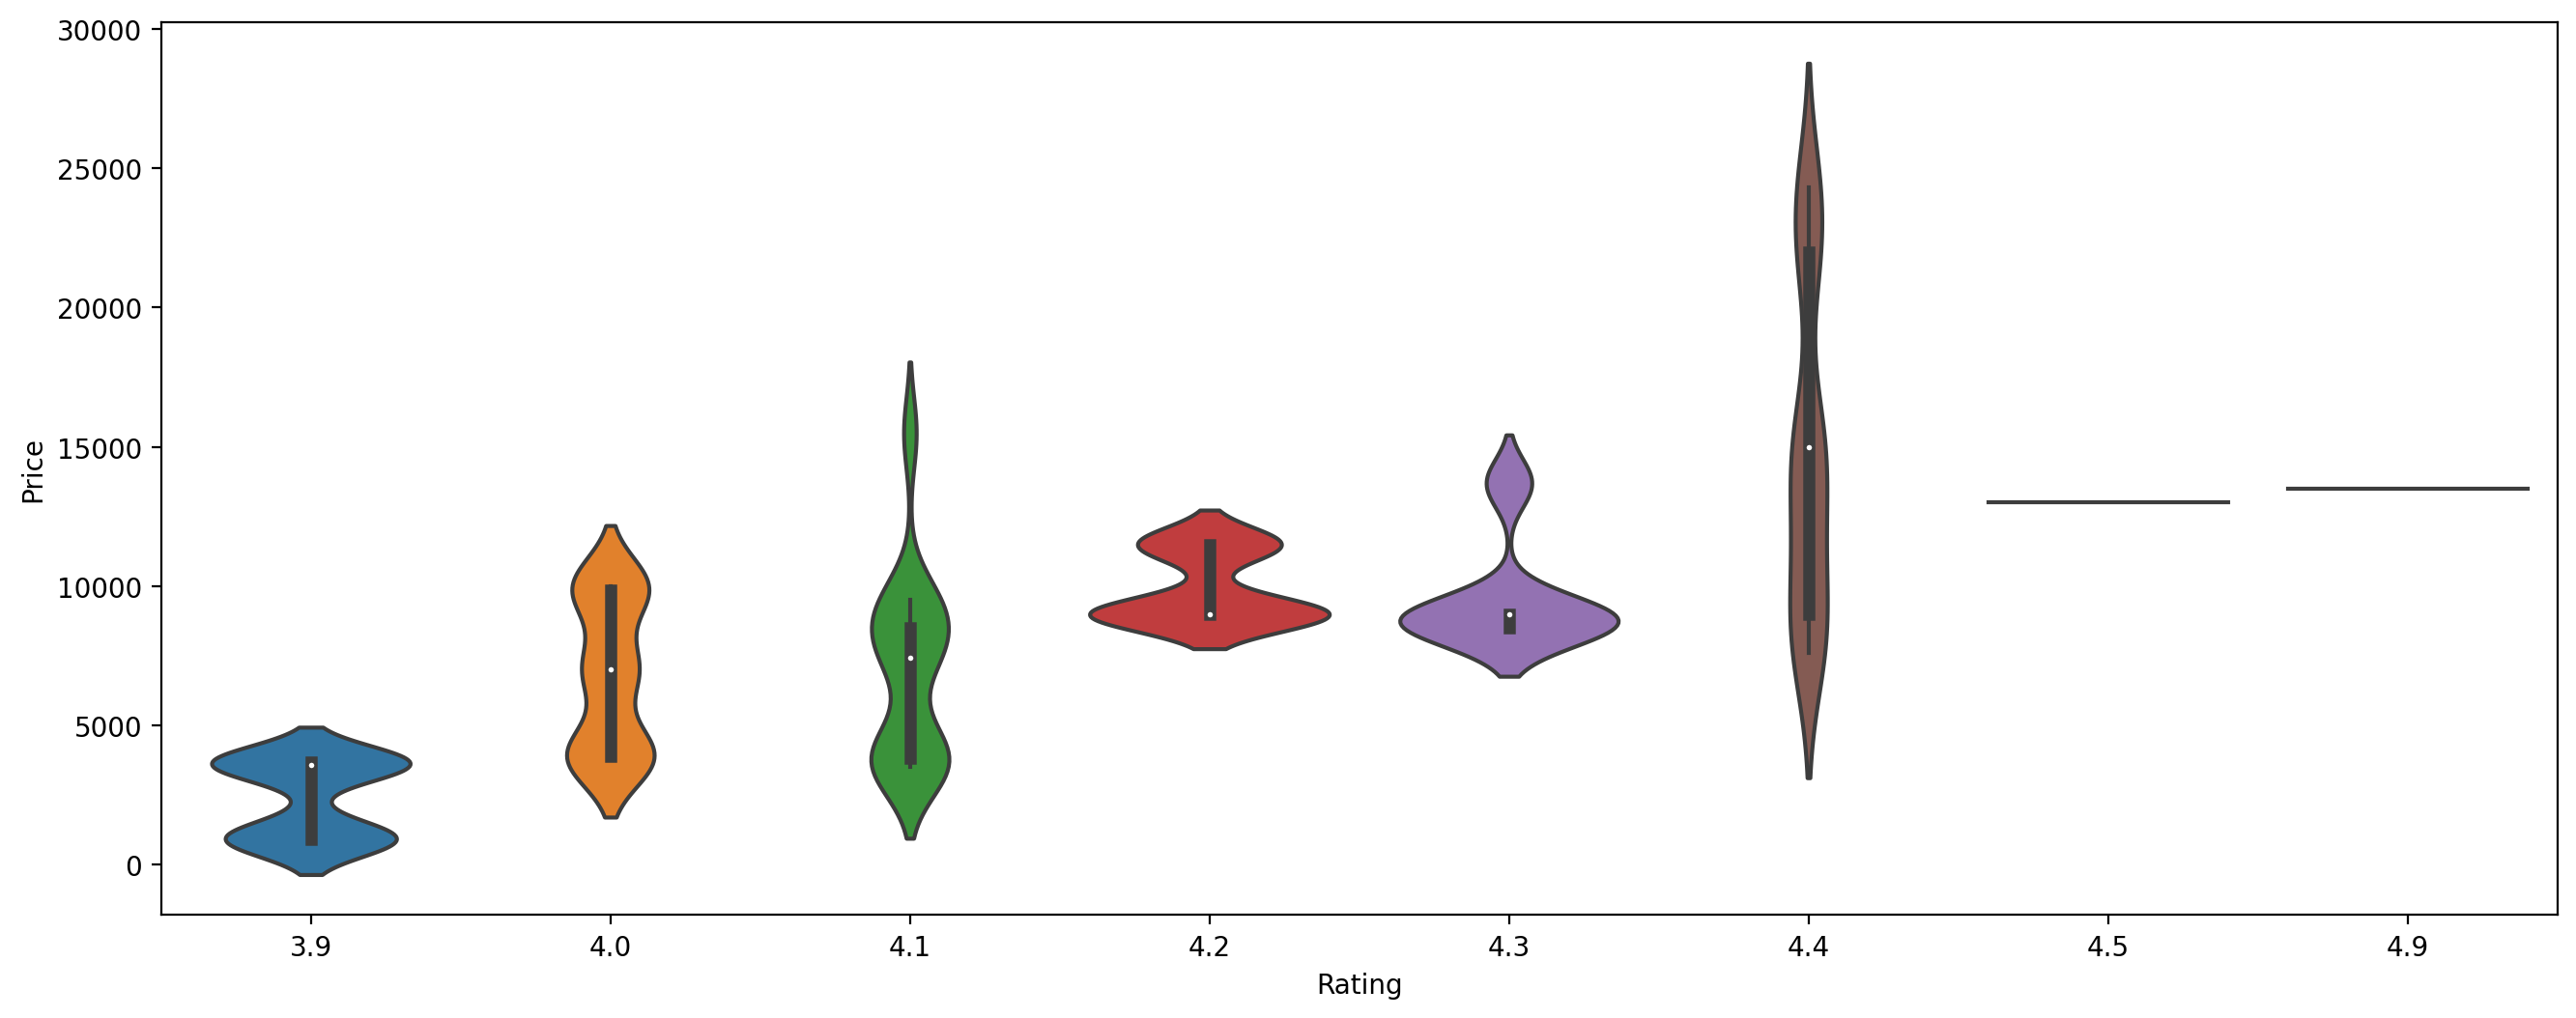

In [40]:
plt.figure(figsize = (16,6), dpi = 200)
sns.violinplot(x='Rating',y='Price', data = purifier) #purifier with high rating has higher price range

<Axes: >

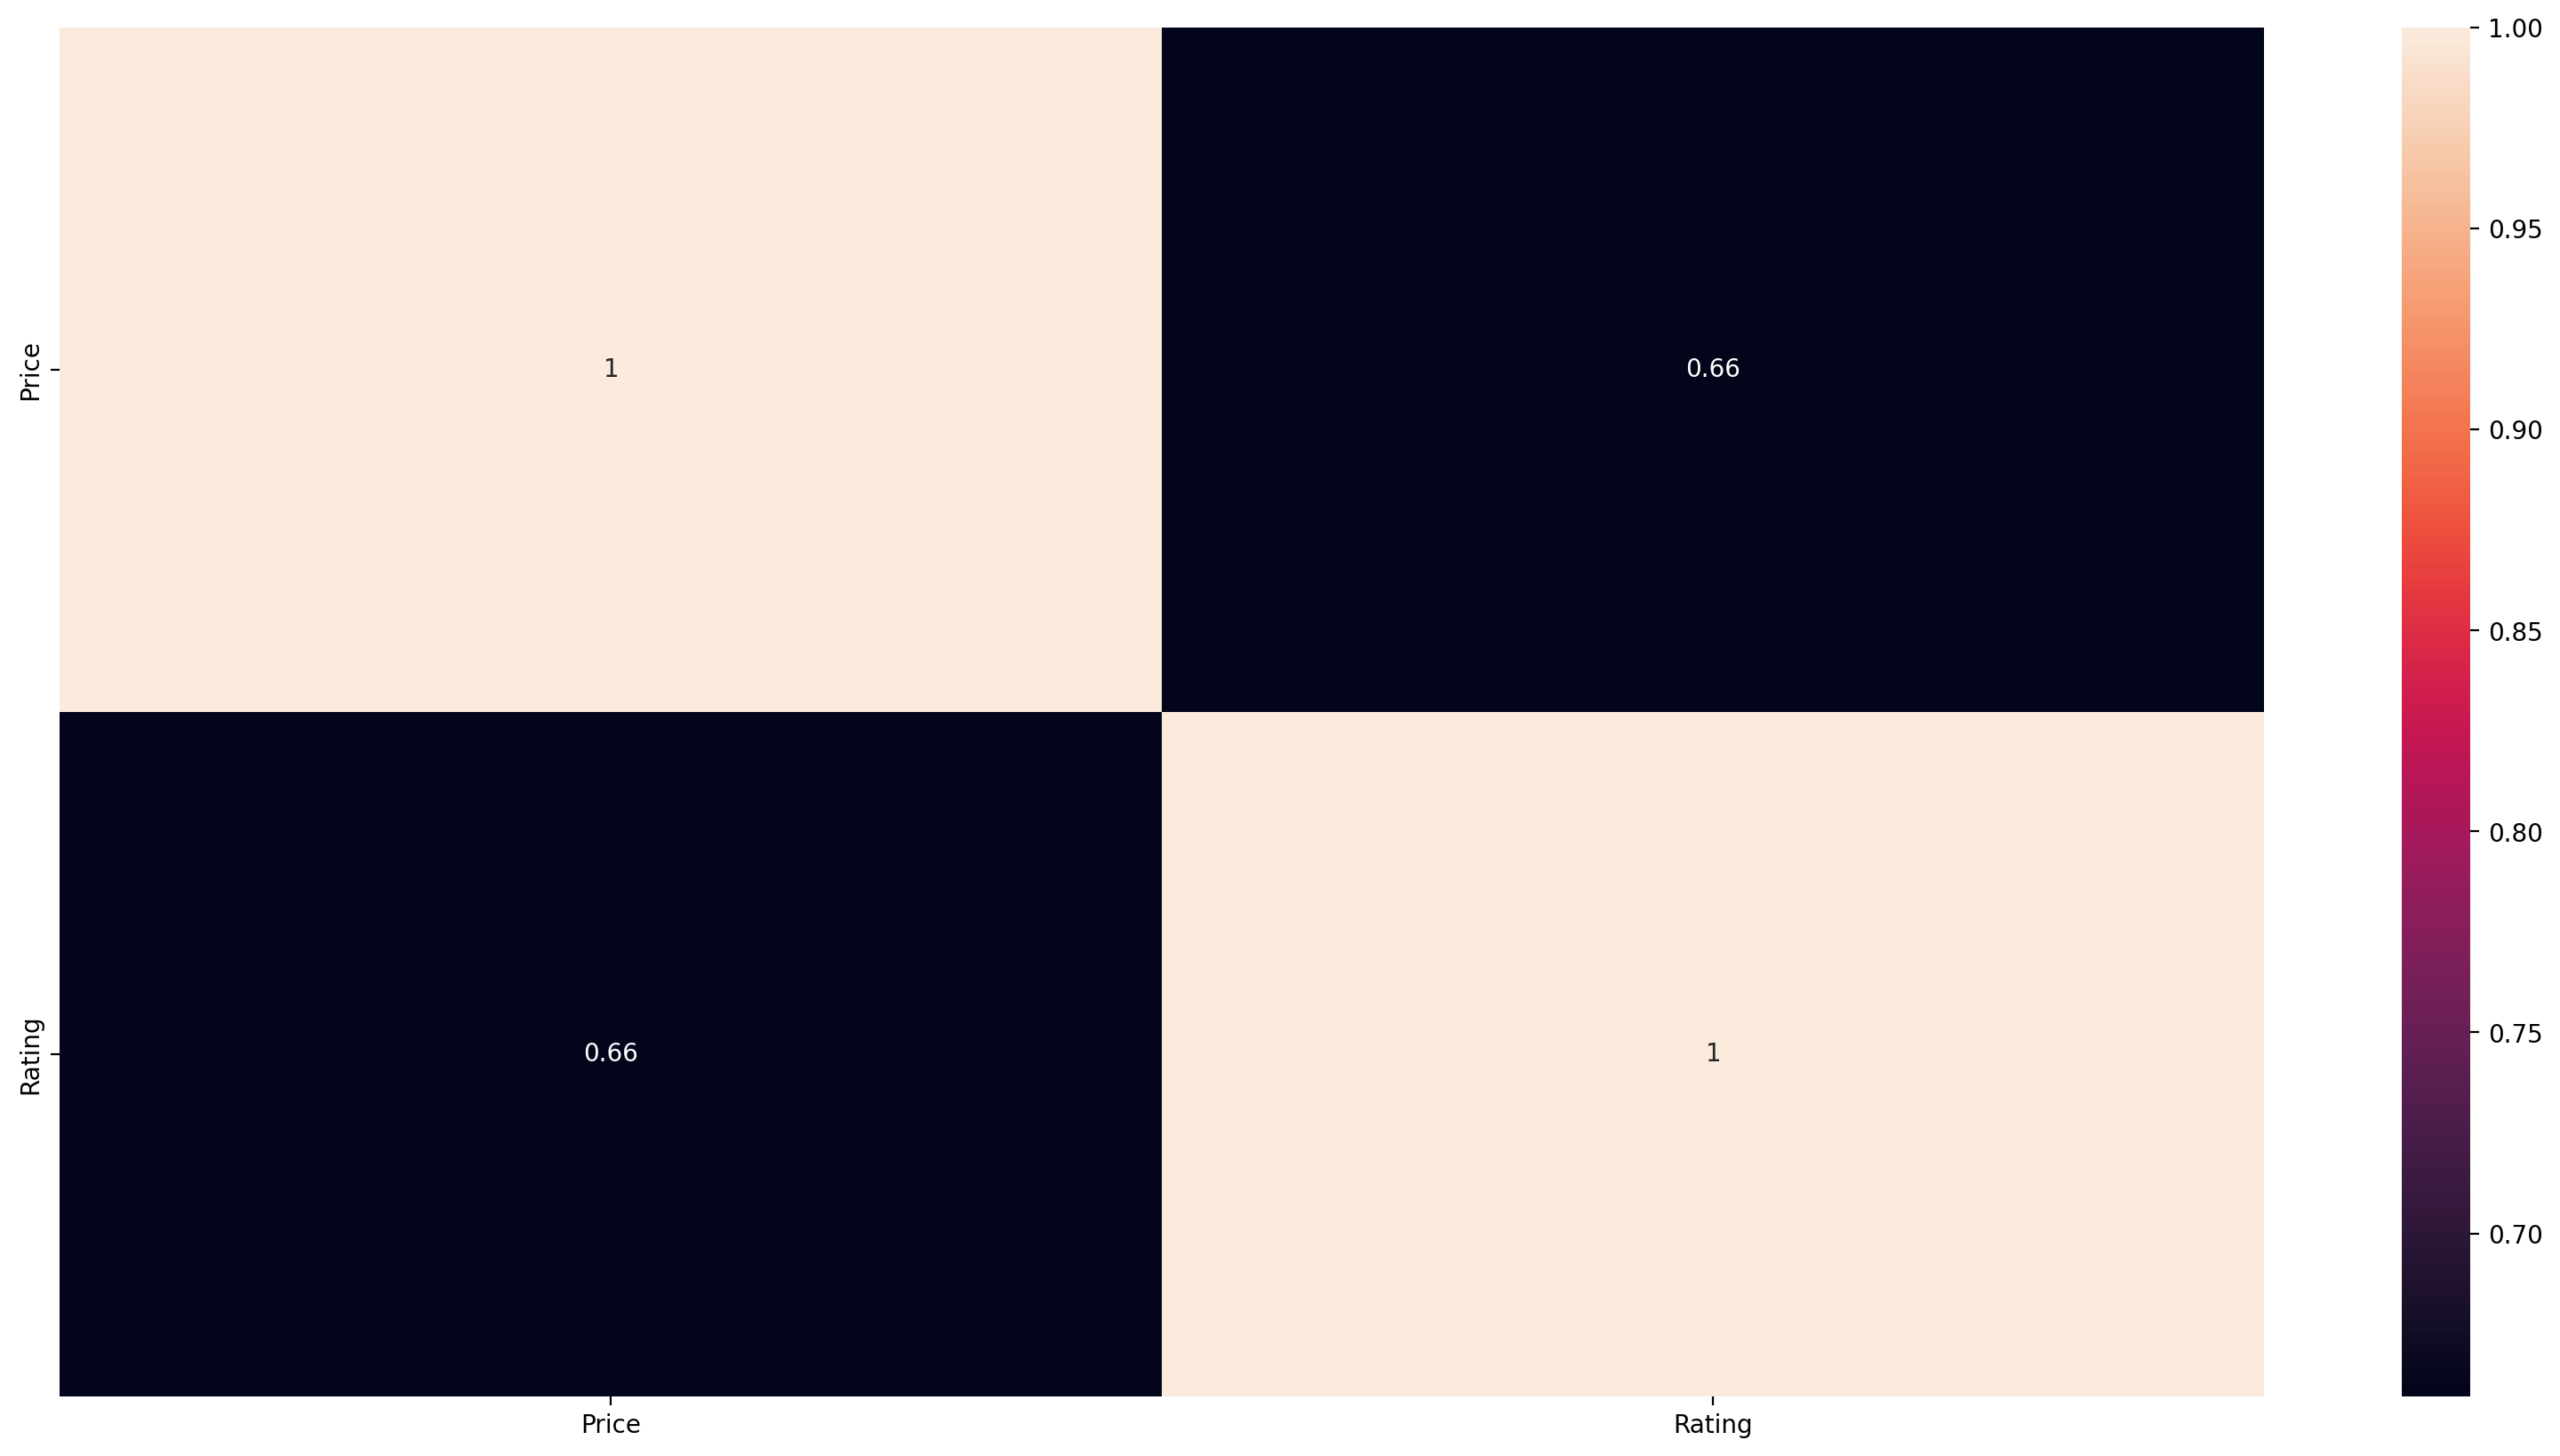

In [42]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(purifier[cols].corr(),annot=True) # correlation with cols